In [21]:
install.packages("")

also installing the dependencies 'htmltools', 'xfun', 'bslib', 'tinytex', 'knitr', 'rmarkdown', 'jsonlite', 'reprex'




  There are binary versions available but the source versions are later:
           binary source needs_compilation
htmltools 0.5.1.1  0.5.2              TRUE
xfun         0.22   0.30              TRUE
bslib       0.2.4  0.3.1             FALSE
tinytex      0.31   0.38             FALSE
knitr        1.33   1.39             FALSE
rmarkdown     2.8   2.14             FALSE
jsonlite    1.7.2  1.8.0              TRUE
reprex      2.0.0  2.0.1             FALSE

  Binaries will be installed
package 'htmltools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'htmltools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\a2018\anaconda3\Lib\R\library\00LOCK\htmltools\libs\x64\htmltools.dll  a C:\Users\a2018\anaconda3\Lib\R\library\htmltools\libs\x64\htmltools.dll: Permission denied"Warning message:
"restored 'htmltools'"

package 'xfun' successfully unpacked and MD5 sums checked
package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\a2018\anaconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll  a C:\Users\a2018\anaconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\a2018\AppData\Local\Temp\RtmpoTdKRc\downloaded_packages


installing the source packages 'bslib', 'tinytex', 'knitr', 'rmarkdown', 'reprex'

Warning message in install.packages("tidyverse"):
"installation of package 'bslib' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'knitr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'rmarkdown' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'reprex' had non-zero exit status"

In [23]:
# Libraries:

#library(hdm)
#library(xtable)
#library("collapse")
#library("ggplot2")
#library("glmnet")
#library("lmtest")
#library("sandwich")

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following object is masked from 'package:collapse':

    is.regular

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



## Orthogonal Learning

In [2]:
# First time

set.seed(1)
B= 50 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 5.*D+ X%*%beta + rnorm(n)

# single selection method

  SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


 if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

 if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

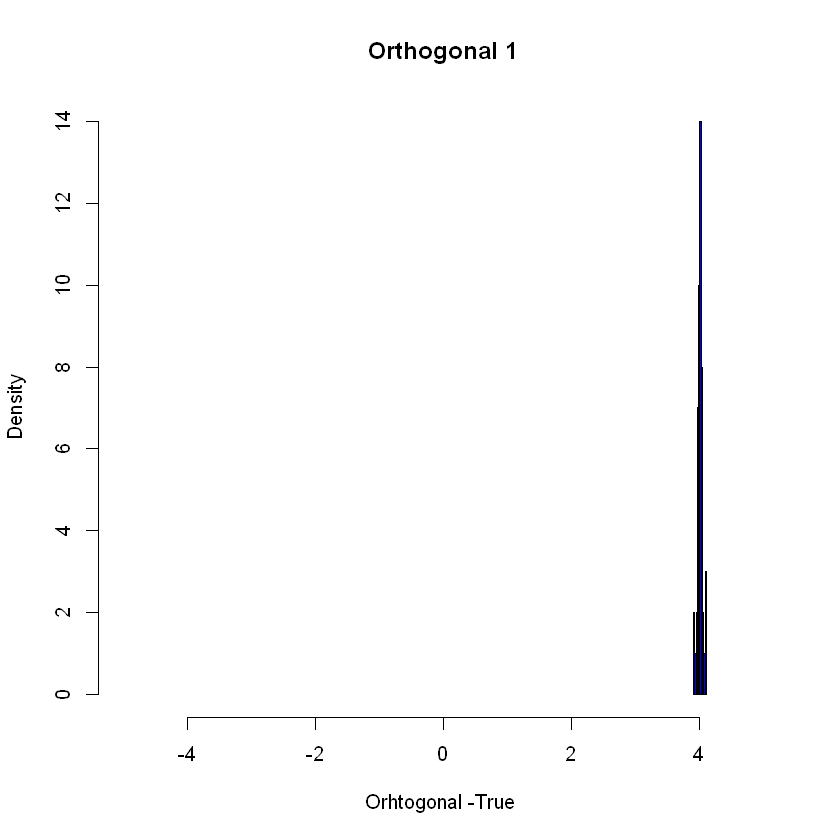

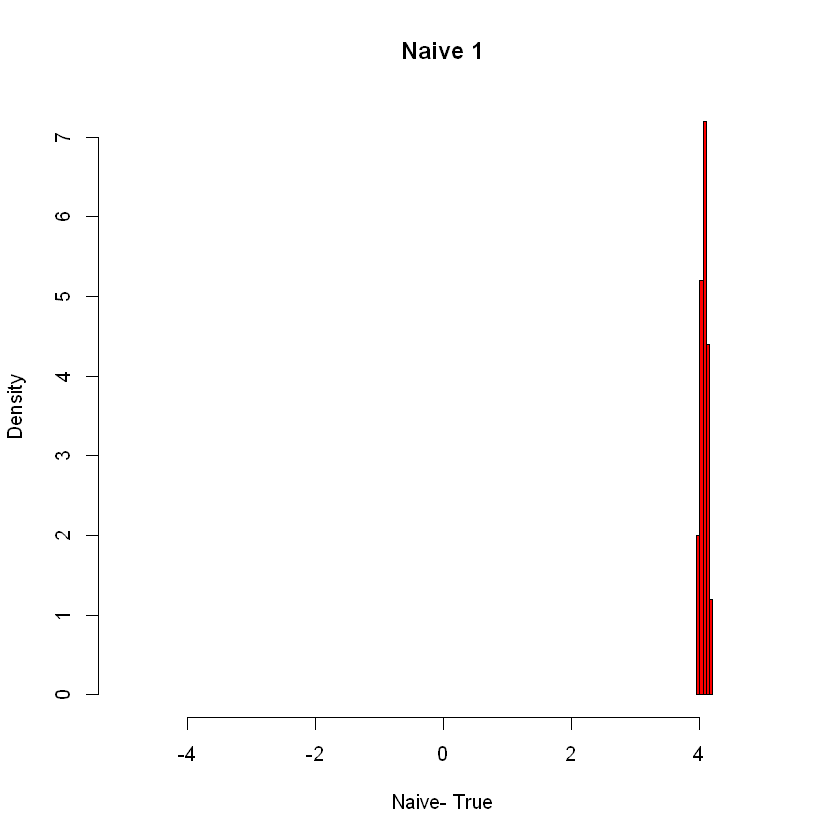

In [3]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(-5, 5), xlab= "Orhtogonal -True ", main="Orthogonal 1")
hist(Naive-1, col=2, freq=F, xlim= c(-5,5), xlab= "Naive- True", main = "Naive 1")

In [4]:
# Second time

set.seed(22)
B= 100 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 5.*D+ X%*%beta + rnorm(n)

# single selection method

  SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


 if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

 if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

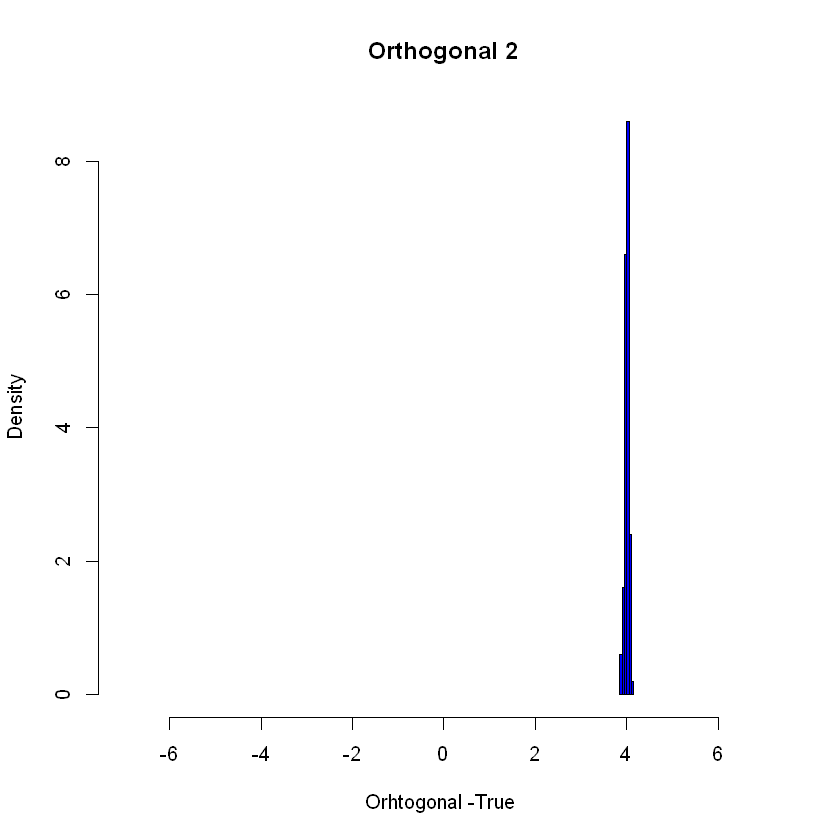

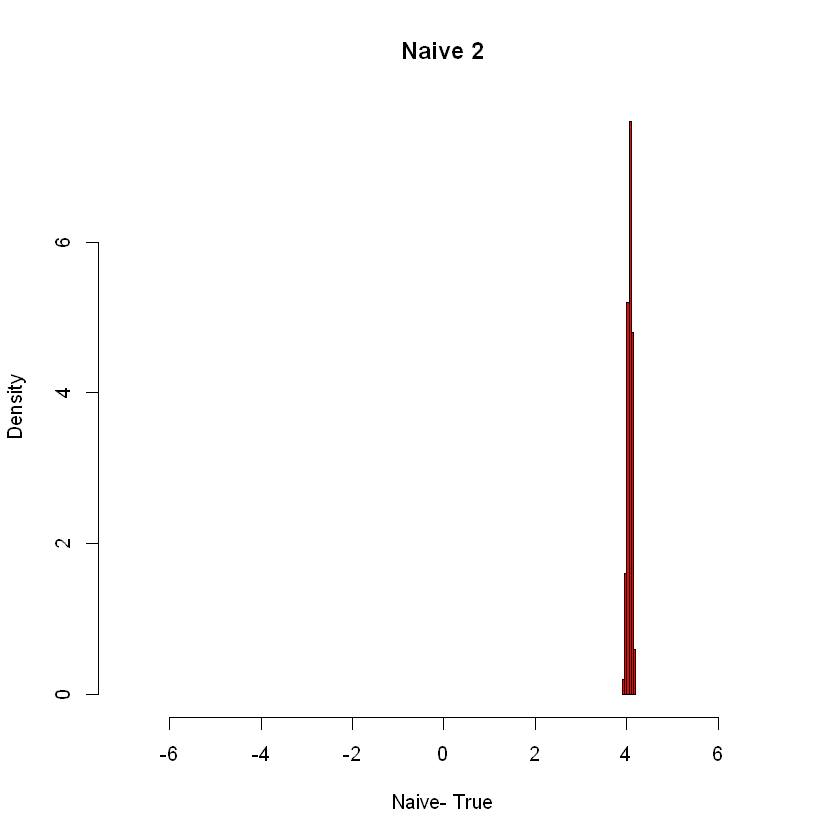

In [5]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(-7, 7), xlab= "Orhtogonal -True ", main="Orthogonal 2")
hist(Naive-1, col=2, freq=F, xlim= c(-7,7), xlab= "Naive- True", main = "Naive 2")

In [6]:
# Third time

set.seed(33)
B= 1000 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 5.*D+ X%*%beta + rnorm(n)

# single selection method

  SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


 if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

 if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

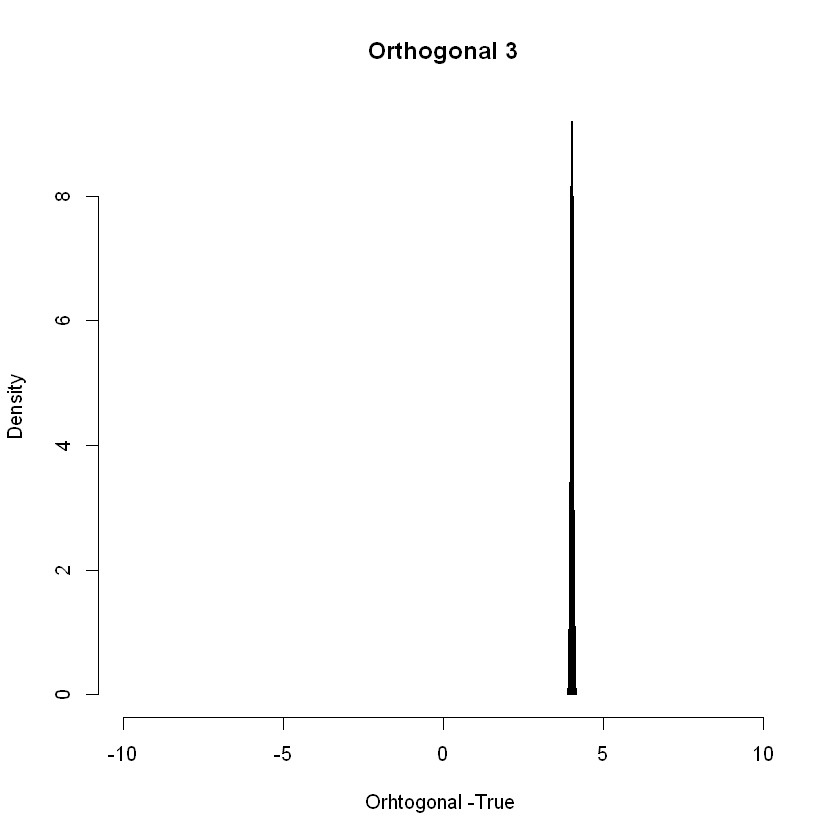

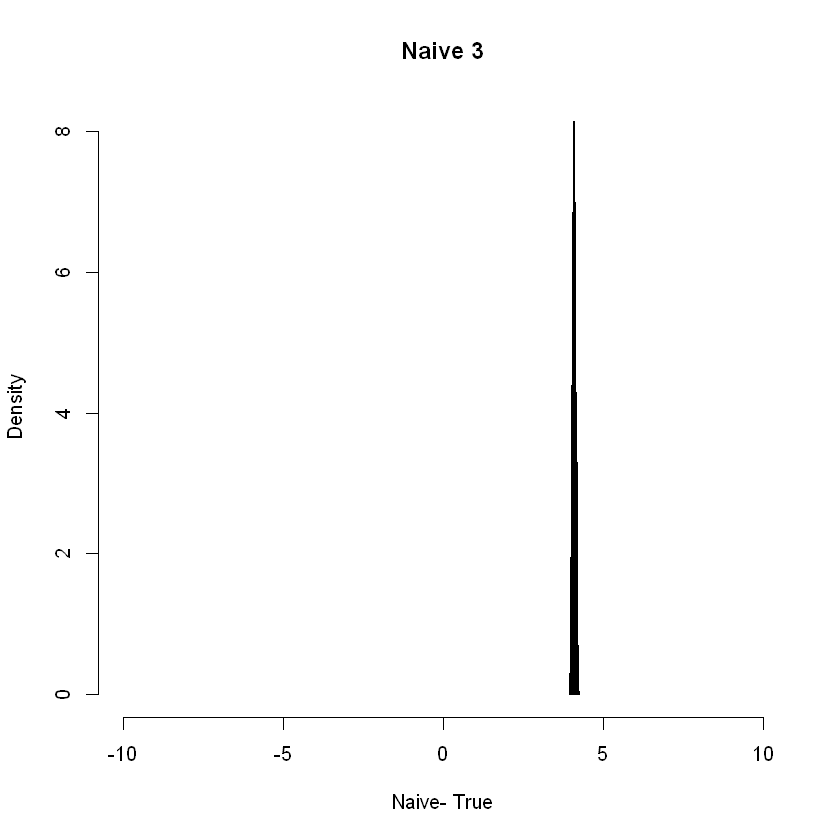

In [7]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(-10, 10), xlab= "Orhtogonal -True ", main="Orthogonal 3")
hist(Naive-1, col=2, freq=F, xlim= c(-10,10), xlab= "Naive- True", main = "Naive 3")

* Explication of the graphs: The histograms seem to be in accordance with the proposed equation: $ Y = 5D + \beta X + \varepsilon ; \varepsilon \xrightarrow[]{dist} Normal$, since the values of X, range and errors are small compared to the multiplier 5 that presents the variable D; also as these are randomly chosen numbers; that is, without a tendency to growth or decrease but tend to a number or interval of numbers around the multiplier 5 such regardless of the number of repetitions of the exercise.

## Double Lasso - Testing the Convergence Hypothesis

* Whats is Double Lasso Approach??

Unlike using a simple OLS, the double Lasso is a matching learning tool, the equation that represents this tool is that of minimization of errors plus a penalty factor, which turns out to be a process of minimization of deviations.

$$ \sum (Y_i-b'X_i)^2+\lambda \sum \left | b_i \right | $$ 

The addition containing lamda in the equation represents the penalty of this process; that is, force some covariates to disappear so that the effect of the other variables on the endogenous variable is cleaner: "remove noise from the regression".

## Replication

In [31]:
GrowthData <- GrowthData
save(GrowthData, file = "../data/GrowthData.RData")
GrowthData

Outcome,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65,...,seccf65,syr65,syrm65,syrf65,teapri65,teasec65,ex1,im1,xr65,tot1
-0.02433575,1,6.591674,0.2837,0.153491,0.043888,0.007,0.013,0.001,0.29,...,0.04,0.033,0.057,0.010,47.6,17.3,0.0729,0.0667,0.348,-0.014727
0.10047257,1,6.829794,0.6141,0.313509,0.061827,0.019,0.032,0.007,0.91,...,0.64,0.173,0.274,0.067,57.1,18.0,0.0940,0.1438,0.525,0.005750
0.06705148,1,8.895082,0.0000,0.204244,0.009186,0.260,0.325,0.201,1.00,...,18.14,2.573,2.478,2.667,26.5,20.7,0.1741,0.1750,1.082,-0.010040
0.06408917,1,7.565275,0.1997,0.248714,0.036270,0.061,0.070,0.051,1.00,...,2.63,0.438,0.453,0.424,27.8,22.7,0.1265,0.1496,6.625,-0.002195
0.02792955,1,7.162397,0.1740,0.299252,0.037367,0.017,0.027,0.007,0.82,...,2.11,0.257,0.287,0.229,34.5,17.6,0.1211,0.1308,2.500,0.003283
0.04640744,1,7.218910,0.0000,0.258865,0.020880,0.023,0.038,0.006,0.50,...,1.46,0.160,0.174,0.146,34.3,8.1,0.0634,0.0762,1.000,-0.001747
0.06733234,1,7.853605,0.0000,0.182525,0.014385,0.039,0.063,0.014,0.92,...,1.59,0.342,0.484,0.207,46.6,14.7,0.0342,0.0428,12.499,0.009092
0.02097768,1,7.703910,0.2776,0.215275,0.029713,0.024,0.035,0.013,0.69,...,1.63,0.184,0.219,0.152,34.0,16.1,0.0864,0.0931,7.000,0.011630
0.03355124,1,9.063463,0.0000,0.109614,0.002171,0.402,0.488,0.314,1.00,...,24.72,3.206,3.154,3.253,28.2,20.6,0.0594,0.0460,1.000,0.008169
0.03914652,1,8.151910,0.1484,0.110885,0.028579,0.145,0.173,0.114,1.00,...,6.76,0.703,0.785,0.620,20.3,7.2,0.0524,0.0523,2.119,0.007584


In [32]:
growth <- GrowthData
attach(growth)    #  to make database objects more 'accessible' to a DataFrame
names(growth)

The following objects are masked from growth (pos = 10):

    bmp1l, ex1, fert1, fert65, freeop, freetar, gde1, gdpsh465,
    geerec1, geetot1, govsh41, govwb1, gpop1, gvxdxe41, h65, hf65,
    high65, highc65, highcf65, highcm65, highf65, highm65, hm65,
    human65, humanf65, humanm65, hyr65, hyrf65, hyrm65, im1, intercept,
    invsh41, lifee065, mort1, mort65, no65, nof65, nom65, Outcome, p65,
    pf65, pinstab1, pm65, pop1565, pop65, pop6565, s65, sec65, secc65,
    seccf65, seccm65, secf65, secm65, sf65, sm65, syr65, syrf65,
    syrm65, teapri65, teasec65, tot1, worker65, xr65



[1] "Outcome"   "intercept" "gdpsh465"  "bmp1l"     "freeop"    "freetar"  
 [7] "h65"       "hm65"      "hf65"      "p65"       "pm65"      "pf65"     
[13] "s65"       "sm65"      "sf65"      "fert65"    "mort65"    "lifee065" 
[19] "gpop1"     "fert1"     "mort1"     "invsh41"   "geetot1"   "geerec1"  
[25] "gde1"      "govwb1"    "govsh41"   "gvxdxe41"  "high65"    "highm65"  
[31] "highf65"   "highc65"   "highcm65"  "highcf65"  "human65"   "humanm65" 
[37] "humanf65"  "hyr65"     "hyrm65"    "hyrf65"    "no65"      "nom65"    
[43] "nof65"     "pinstab1"  "pop65"     "worker65"  "pop1565"   "pop6565"  
[49] "sec65"     "secm65"    "secf65"    "secc65"    "seccm65"   "seccf65"  
[55] "syr65"     "syrm65"    "syrf65"    "teapri65"  "teasec65"  "ex1"      
[61] "im1"       "xr65"      "tot1"

In [27]:
# OLS (base line model)
reg.ols <- lm(Outcome~.-1,data=growth) # the rate ('Outcome') is regressed with all the variables except the intercept
summary(reg.ols)


Call:
lm(formula = Outcome ~ . - 1, data = growth)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040338 -0.011298 -0.000863  0.011813  0.043247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
intercept  2.472e-01  7.845e-01   0.315  0.75506   
gdpsh465  -9.378e-03  2.989e-02  -0.314  0.75602   
bmp1l     -6.886e-02  3.253e-02  -2.117  0.04329 * 
freeop     8.007e-02  2.079e-01   0.385  0.70300   
freetar   -4.890e-01  4.182e-01  -1.169  0.25214   
h65       -2.362e+00  8.573e-01  -2.755  0.01019 * 
hm65       7.071e-01  5.231e-01   1.352  0.18729   
hf65       1.693e+00  5.032e-01   3.365  0.00223 **
p65        2.655e-01  1.643e-01   1.616  0.11727   
pm65       1.370e-01  1.512e-01   0.906  0.37284   
pf65      -3.313e-01  1.651e-01  -2.006  0.05458 . 
s65        3.908e-02  1.855e-01   0.211  0.83469   
sm65      -3.067e-02  1.168e-01  -0.263  0.79479   
sf65      -1.799e-01  1.181e-01  -1.523  0.13886   
fert65     6.881e-03  2.705e-02   0.254

In [28]:
est_ols <- summary(reg.ols)$coef["gdpsh465",1] 
# output: estimated regression coefficient corresponding to the target regressor

std_ols <- summary(reg.ols)$coef["gdpsh465",2] 
# output: std. error

ci_ols <- confint(reg.ols)[2,]   
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(est_ols,std_ols,ci_ols[1],ci_ols[2]))
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS") 

In [29]:
results_ols

,estimator,standard error,lower bound CI,upper bound CI
OLS,-0.009377989,0.02988773,-0.07060022,0.05184424


In [39]:
# Double Lasso using theoretical Lambda

Y <- growth[, 1] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- growth[, 3] # target regressor
dim(W)



[1] 90 60

In [40]:
rlasso(x=W,y=Y)


Call:
rlasso.default(x = W, y = Y)

Coefficients:
(Intercept)        bmp1l       freeop      freetar          h65         hm65  
    0.05810     -0.07557      0.00000      0.00000      0.00000      0.00000  
       hf65          p65         pm65         pf65          s65         sm65  
    0.00000      0.00000      0.00000      0.00000      0.00000      0.00000  
       sf65       fert65       mort65     lifee065        gpop1        fert1  
    0.00000      0.00000      0.00000      0.00000      0.00000      0.00000  
      mort1      invsh41      geetot1      geerec1         gde1       govwb1  
    0.00000      0.00000      0.00000      0.00000      0.00000      0.00000  
    govsh41     gvxdxe41       high65      highm65      highf65      highc65  
    0.00000      0.00000      0.00000      0.00000      0.00000      0.00000  
   highcm65     highcf65      human65     humanm65     humanf65        hyr65  
    0.00000      0.00000      0.00000      0.00000      0.00000      0.00000  
 

In [41]:
r.Y <- rlasso(x=W,y=Y)$res # to obtain residuals 
r.D <- rlasso(x=W,y=D)$res

In [42]:
partial.lasso <- lm(r.Y ~ r.D)

In [44]:
summary(partial.lasso)


Call:
lm(formula = r.Y ~ r.D)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.134088 -0.024875  0.000313  0.023809  0.137749 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.857e-17  4.729e-03   0.000 1.000000    
r.D         -4.981e-02  1.394e-02  -3.574 0.000573 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04486 on 88 degrees of freedom
Multiple R-squared:  0.1268,	Adjusted R-squared:  0.1168 
F-statistic: 12.77 on 1 and 88 DF,  p-value: 0.000573


In [45]:
est_lass<- summary(partial.lasso)$coef["r.D",1] 
# output: estimated regression coefficient corresponding to the target regressor

std_lass <- summary(partial.lasso)$coef["r.D",2] 
# output: std. error

ci_lass <- confint(partial.lasso)[2,]   
# output: 95% confidence interval

results_lasso <- as.data.frame(cbind(est_lass,std_lass,ci_lass[1],ci_lass[2]))
colnames(results_lasso) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_lasso) <-c("LASSO") 

In [46]:
results_lasso

,estimator,standard error,lower bound CI,upper bound CI
LASSO,-0.04981147,0.01393636,-0.07750705,-0.02211588


In [47]:
## Using Partilliang out

lasso.effect = rlassoEffect(x = W, y = Y, d = D, method = "partialling out")
summary(lasso.effect)

[1] "Estimates and significance testing of the effect of target variables"
     Estimate. Std. Error t value Pr(>|t|)    
[1,]  -0.04981    0.01394  -3.574 0.000351 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [49]:
CIdf

x,y,lower,upper
OLS,-0.009377989,-0.07060022,0.05184424
LASSO,-0.049811465,-0.07750705,-0.02211588


* It's the same result we saw in class; in this case, the OLS estimator is not reliable because the values that it could take, according to its confidence interval, are close to zero or may even be zero. In this case, it is chosen to opt for the estimator as a result of Lasso, because the values that this estimator could take, according to its confidence interval, are only negative values and never cross zero with a certainty of 95%

In [ ]:
# Plotting confidence intervals

CIdf <- data.frame(x = c('OLS','LASSO'),
                         y = c(results_ols[1,1], results_lasso[1,1]),
                         lower = c(results_ols[1,3],results_lasso[1,3]),
                         upper = c(results_ols[1,4],results_lasso[1,4]))

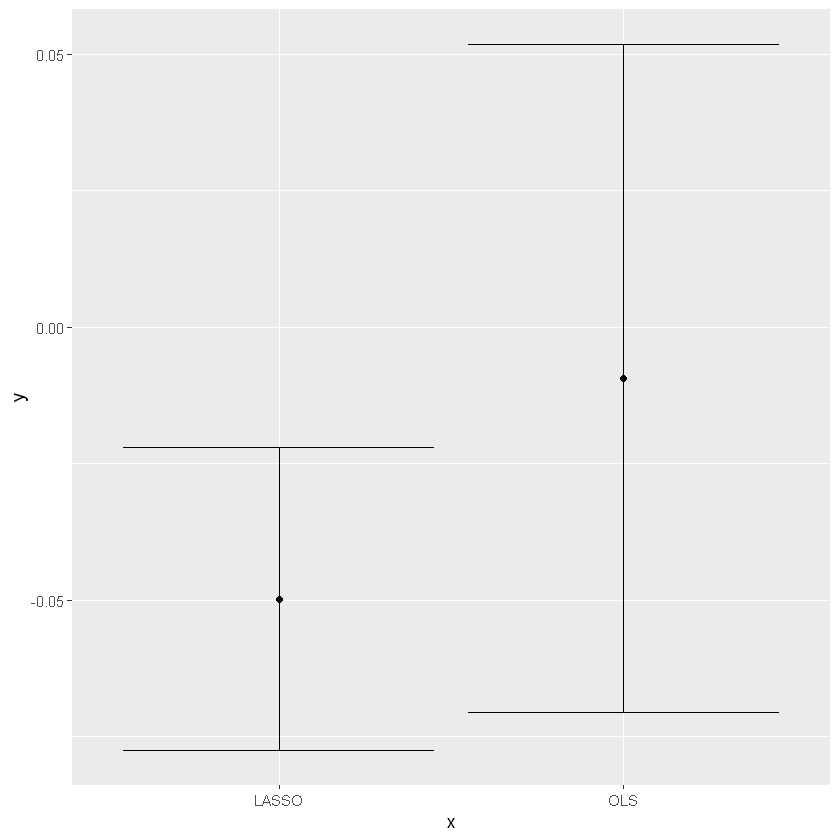

In [51]:
ggplot(CIdf, aes(x, y)) +        # ggplot2 plot with confidence intervals
  geom_point() +
  geom_errorbar(aes(ymin = lower, ymax = upper))

## Proving the Neyman Orthogonality Condition

* Remember that one of the equations to estimate was this: $$ Y = \alpha D +\beta 'W + \epsilon $$

Punctually, you want to know the value of $\alpha$.Well for this, the estimation through the double lasso was used only if the ratio between observations and covariates was relatively large and to calculate the predicted errors, for example the predicted error of $D$ , as follows

$$ \tilde{D} = D - \gamma' _{DW}W  $$

Analogously for  $ \tilde{Y} $

$$ \tilde{Y} = Y - \gamma' _{YW}W  $$

Where $ \gamma' _{DW}W $  is represented by a Lasso estimate: 

$$  \gamma' _{DW} = argMin \left \{ \sum \left ( D_i-\gamma 'W \right )^2 + \lambda _1\sum \hat{\varphi _i} \left | \gamma _j \right |\right \} $$

Analogously for  $ \gamma' _{YW}W $

$$  \gamma' _{DW} = argMin \left \{ \sum \left ( Y_i-\gamma 'W \right )^2 + \lambda _1\sum \hat{\varphi _i} \left | \gamma _j \right |\right \} $$

Now, it is known that after regressing the predicted errors $ \tilde{D}$ and $ \tilde{Y}$, the alpha $\breve{\alpha }$ value fulfills an important property: "alpha $\breve{\alpha }$ is insensitive to the first order of the local perturbations of the parameters that are close to the true value"

Expressed mathematically : 

$$ K = \frac{\partial{\alpha }}{\partial \eta } (\eta ^0) = 0  ... (1) $$ 

* And that equality will only be fulfilled if Neyman's orthogonality is present explained below

The following function form with arguments $a$ y $ \eta $ is proposed 

$$ M(a,\eta) = E \left [ \left ( \tilde{Y}(\eta _1)-a\tilde{D}(\eta _2)\right ) \tilde{D}(\eta _2)\right ] ... (2)$$

It is also assumed that in the optimal $a$ is equal to $\alpha$ and $\eta$ is known to represent an ordered pair; that is, it has two arguments $(\eta_1 ,\eta_2 )$ 

Also, to prove equation $(1)$, it is necessary to have a functional form of $\alpha$ in $\eta$. Also, to prove equation (1), it is necessary to have a functional form of $\alpha$ in $\eta$. To do this, the implicit function theorem is necessary because it meets the requirements to apply this theorem, since the functio $M = (\alpha ;\eta) $ is equal to zero for the following:

$$ \rightarrow \tilde{Y} = a\tilde{D} + \epsilon $$ $$ \rightarrow (\tilde{Y}-a\tilde{D}) = \epsilon ... (3) $$

(3) in (2): 

$$ M(a,\eta) = E \left [ \epsilon \tilde{D}(\eta _2)\right ] = 0 $$

This is because the expected error with the regressor is zero for the OLS orthogonality assumption.

Then the functional form of $\alpha$ in $\eta$ must be born from equation $(2)$ when $a$ is equal to $\alpha$. Specifically the next expression should be equal to zero

$$ T = {\partial \alpha } M(\alpha , \eta ^0)^{-1}{\partial \eta } M(\alpha , \eta ^0) = 0 $$

Specifically the expression $ {\partial \eta } M(\alpha , \eta ^0) $ is divided into two arguments, since $\eta ^{0} = (\eta _{1}, \eta _{2}) $. And this expression ${\partial \eta } M(\alpha , \eta ^0)$ is the one that must become zero, because this other ${\partial \alpha } M(\alpha , \eta ^0)^{-1}$ expression is elevated to $(-1)$, and the expression $ \frac{1}{0} $ is different from zero.

So, the expression to focus in is

 $$ {\partial \eta } M(\alpha , \eta ^0)  = \frac{\partial M }{\partial \eta_{1}}{\mathrm{d}\eta_{1}} + \frac{\partial M }{\partial \eta_{2}}{\mathrm{d}\eta_{2}} $$

Where $$ \frac{\partial M }{\partial \eta_{1}}{\mathrm{d}\eta_{1}} = E\left [ \frac{\partial \tilde{Y} (\eta_{1})}{\partial \eta_{1}} . \tilde{D} \right ]$$

and taking into account that $$\tilde{Y} = Y - \eta _{1}W$$

The expression would be $E\left [ W . \tilde{D} \right ]$ , and this would be zero for the following

$$ W.\tilde{D} = W (D-\eta _{2}W) ; \eta _{2} = (W'W)^{-1} (W'D) $$

$$ \rightarrow  W\tilde{D} = WD - W (W'W)^{-1}(W'D)W$$ 

$$ \rightarrow  W\tilde{D}=WD - W (W'W)^{-1}(W'W)D $$

$$ \rightarrow  W\tilde{D} = WD - WID $$

$$\rightarrow W\tilde{D} = WD - WD$$

$$ \rightarrow W\tilde{D} = 0 $$

The other adding

$$ \frac{\partial M }{\partial \eta_{2}}{\mathrm{d}\eta_{2}} = E\left [ \left ( -\alpha .\frac{\partial \tilde{D}(\eta _{2})}{\partial \eta _{2}} \right )\tilde{D} + \frac{\partial \tilde{D}(\eta _{2})}{\partial \eta _{2}} (\tilde{Y}-\alpha \tilde{D}) \right ] $$

Taking into account

$$ \tilde{D} = D - \eta_{2}W  $$

So, it would be summarized in

$$ \rightarrow \frac{\partial M }{\partial \eta_{2}} = E\left [ \left ( -\alpha  \right )W \tilde{D} + (-W)(\tilde{Y}-\alpha \tilde{D})\right ] $$ 

$$\rightarrow \frac{\partial M }{\partial \eta_{2}} = E(W\tilde{Y}) + 2 E(\alpha W\tilde{D})$$

By the Orthogonality property of the OLS 

$$\rightarrow \frac{\partial M }{\partial \eta_{2}} = E(0) + 2 E(\alpha 0)$$

$$ \rightarrow \frac{\partial M }{\partial \eta_{2}} = 0 $$

Since it has been shown to be equal to zero, it can be concluded that the expression $ K = \frac{\partial{\alpha }}{\partial \eta } (\eta ^0) $ is zero and the Neyman orthogonality property is present to support the contribution of the double Lassus on the return $\alpha$ mentioned above.